<a href="https://colab.research.google.com/github/pdannana/Cognifyz_data-science-internship/blob/main/level2_taks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Display the first few rows of the dataset to understand its structure
df.head()


Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Percentage of restaurants that offer table booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of restaurants that offer online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


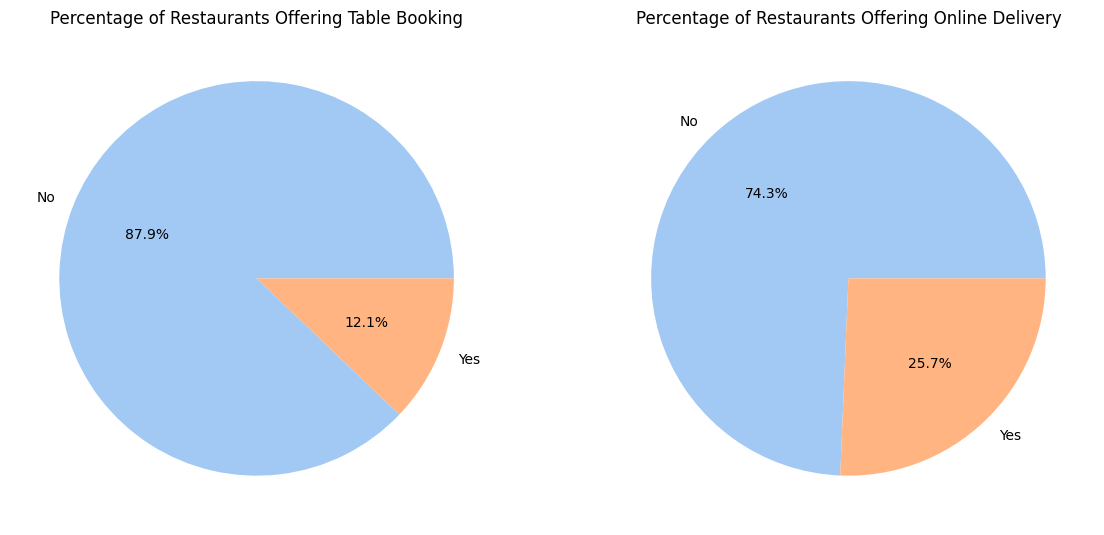

In [3]:
# Check for null values in 'Has Table booking' and 'Has Online delivery' columns
df['Has Table booking'].fillna('No', inplace=True)
df['Has Online delivery'].fillna('No', inplace=True)

# Calculate percentages
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100

# Print the results
print("Percentage of restaurants that offer table booking:")
print(table_booking_percentage)
print("\nPercentage of restaurants that offer online delivery:")
print(online_delivery_percentage)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot table booking percentage
axes[0].pie(table_booking_percentage, labels=table_booking_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[0].set_title('Percentage of Restaurants Offering Table Booking')

# Plot online delivery percentage
axes[1].pie(online_delivery_percentage, labels=online_delivery_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1].set_title('Percentage of Restaurants Offering Online Delivery')

plt.show()


Average ratings of restaurants with and without table booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


<ipython-input-4-c8e4b5cd9a2a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, palette="pastel")


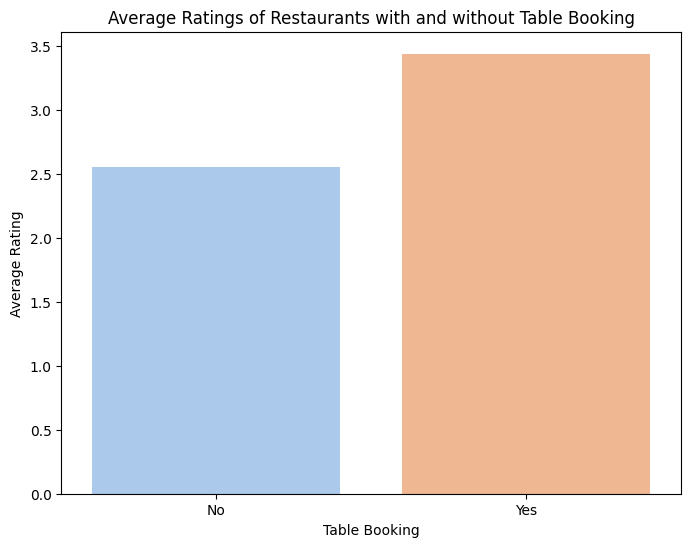

In [4]:
# Ensure 'Aggregate rating' column is in numeric format
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Calculate average ratings
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

# Print the results
print("Average ratings of restaurants with and without table booking:")
print(avg_rating_table_booking)

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, palette="pastel")
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.show()


Online delivery availability across different price ranges:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


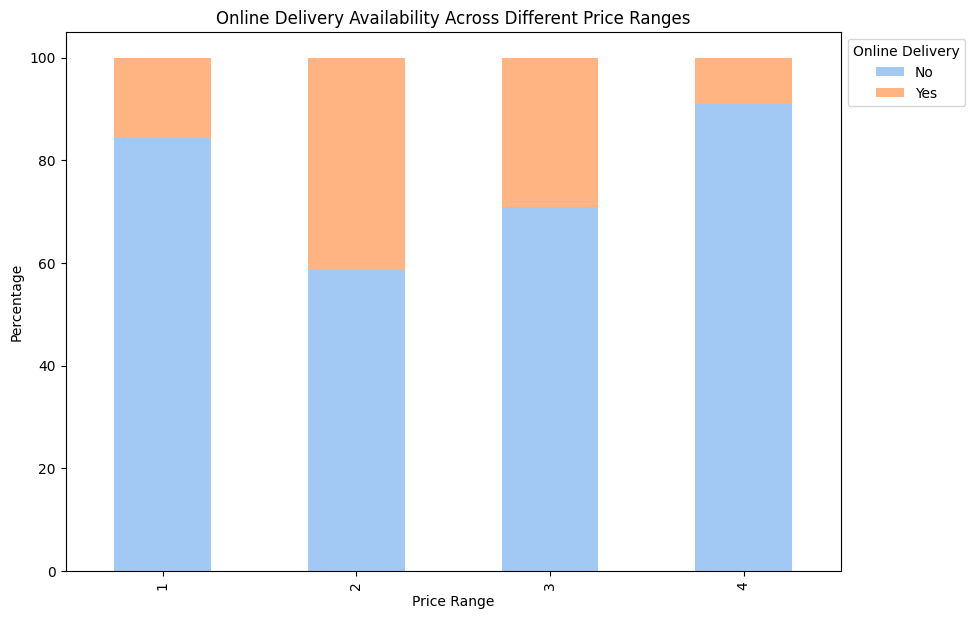

In [5]:
# Calculate online delivery availability across price ranges
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100

# Print the results
print("Online delivery availability across different price ranges:")
print(online_delivery_by_price)

# Plot the results
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 7), color=sns.color_palette("pastel"))
plt.title('Online Delivery Availability Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
